In [1]:
# (1) Understanding business probelm from this Data Set #
# Matches data set has all IPL matches from session 2008 to 2018.
# I have to analysis data set on IPL Matches using EDA and with help of visual interpretation.
# I have to hypothesize, which teams are most likely to win IPL matches.

In [2]:
# (2) Downloading the Matches Data Set #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling
%matplotlib inline
sn.set()

In [3]:
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")

In [4]:
### (3) Data Profiling

In [5]:
### (3.1) Understanding Matches Data Set. 

In [6]:
matches.shape                              # Matches DataSet is having 696 Records with 18 columns.

(696, 18)

In [7]:
matches.info()                             # Getting Matches DataSet Index, Datatype of columns and Memory Usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [8]:
matches.columns                             # Finding name of all columns in Matches DataSet.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [9]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [10]:
matches.tail(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [11]:
matches.describe()                          # Getting here Basic Statistic info for numeric columns to get into some findings.

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [12]:
matches.isnull().sum()                                   # Column 'umpire3' have maximum number of null values.

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [13]:
### (3.2) Pre Profiling on Matches DataSet to identify columns for performing Preprocessing. 
pandas_profiling.ProfileReport(matches).to_file(output_file='Matches_Before_Preprocessing.html')

C:\Users\DELL PC\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 6).')
  correlation_name=correlation_name, error=error


In [14]:
### (3.3) PreProcessing 

# Based on pandas_profiling we find out the below columns to be preprocessed.
# 1. Column 'umpire3' have more than of 90% missing values so we shall reomve this column for DataSet.
# 2. Column 'winner' have 3 missing values so we shall replace with mode value of this for DataSet.
# 3. From pandas profiling Missing value treatment is not required for missing values columns as these varaible are having meaningfull insights.

In [15]:
matches.drop('umpire3', axis=1, inplace=True)               # Romoving column 'umpire3' from matches dataset.

matches.winner = matches.winner.fillna(matches['winner'].mode()[0])

In [16]:
### (3.4) Post Pandas Profiling.
pandas_profiling.ProfileReport(matches).to_file(output_file='Matches_After_Preprocessing.html')

C:\Users\DELL PC\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 6).')
  correlation_name=correlation_name, error=error


In [17]:
# Form above pandas profiling we got new matches dataset with 17 columns not with 18 columns.

In [18]:
### Start to find out Questions and their Answers with help of ploting and representing data with graphs.

In [19]:
# Question-1. Find out number of the matches for each team played with other teams.
matches.pivot_table(index='team1', columns='team2', values='id', aggfunc=lambda x: int(len(x.unique())))

team2,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
team1,,,,,,,,,,,,,,
Chennai Super Kings,NaN,8.0,12.0,NaN,9.0,2.0,12.0,11.0,4.0,11.0,NaN,NaN,10.0,4.0
Deccan Chargers,2.0,NaN,8.0,NaN,7.0,1.0,2.0,5.0,3.0,7.0,NaN,NaN,8.0,NaN
Delhi Daredevils,6.0,3.0,NaN,NaN,11.0,2.0,10.0,6.0,2.0,10.0,2.0,2.0,12.0,6.0
Gujarat Lions,NaN,NaN,4.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1.0,5.0
Kings XI Punjab,10.0,3.0,11.0,4.0,NaN,NaN,16.0,14.0,2.0,8.0,1.0,1.0,9.0,5.0
Kochi Tuskers Kerala,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,NaN
Kolkata Knight Riders,6.0,7.0,11.0,3.0,7.0,NaN,NaN,12.0,3.0,2.0,1.0,NaN,16.0,6.0
Mumbai Indians,13.0,5.0,16.0,2.0,8.0,1.0,11.0,NaN,3.0,12.0,2.0,1.0,12.0,5.0
Pune Warriors,2.0,1.0,4.0,NaN,4.0,NaN,2.0,3.0,NaN,3.0,NaN,NaN,1.0,NaN


In [20]:
# Answer-1: From above DataSet table we could conclude that =>
# 1. Team 'Kolkata Knight Riders' has played 16 matches (maximum) with teams 'Rajasthan Royals' and 'Kings XI Punjab'
# 2. Team 'Mumbai Indians' and team 'Rajasthan Royals' and 'Delhi Daredevils' have played 16 matches (max) with eachother.

Text(0.5, 1.0, 'Count plot for winner.')

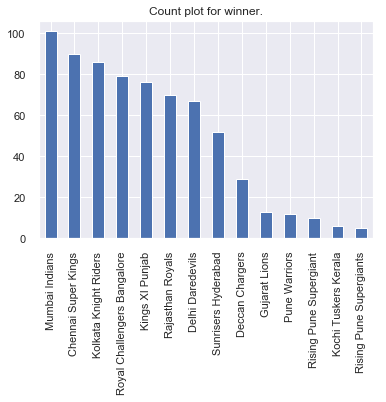

In [21]:
# Question-2: Find which team has won how many times in descending order.  
matches['winner'].value_counts().plot.bar().set_title('Count plot for winner.')

Text(0.5, 1.0, 'Count plot for winner.')

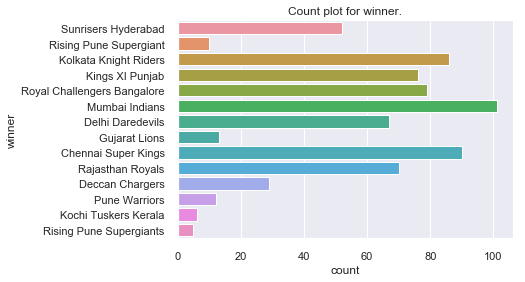

In [22]:
sn.countplot(y='winner', data=matches).set_title('Count plot for winner.')

In [23]:
# Answer-2: From above plotting we can say 'Mumbai Indians' have won maximum number of matches.

In [24]:
# Question-3: Find out which team have played maximum number of matches which were not completed. 
# And which team have played maximum number of matches which were tied.

In [25]:
# Prepare dataset with sortest teams names.
ds_with_sort_team_names = matches.copy()

In [26]:
ds_with_sort_team_names['team1'] = ds_with_sort_team_names['team1'].map({'Chennai Super Kings':'CSK', 'Deccan Chargers':'DC', 'Delhi Daredevils':'DD',
       'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP', 'Kochi Tuskers Kerala':'KTK',
       'Kolkata Knight Riders':'KKR', 'Mumbai Indians':'MI', 'Pune Warriors':'PW',
       'Rajasthan Royals':'RR', 'Rising Pune Supergiant':'RPS', 'Rising Pune Supergiants':'RPSS',
       'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SH'})

ds_with_sort_team_names['team2'] = ds_with_sort_team_names['team2'].map({'Chennai Super Kings':'CSK', 'Deccan Chargers':'DC', 'Delhi Daredevils':'DD',
       'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP', 'Kochi Tuskers Kerala':'KTK',
       'Kolkata Knight Riders':'KKR', 'Mumbai Indians':'MI', 'Pune Warriors':'PW',
       'Rajasthan Royals':'RR', 'Rising Pune Supergiant':'RPS', 'Rising Pune Supergiants':'RPSS',
       'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SH'})

ds_with_sort_team_names['winner'] = ds_with_sort_team_names['winner'].map({'Chennai Super Kings':'CSK', 'Deccan Chargers':'DC', 'Delhi Daredevils':'DD',
       'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP', 'Kochi Tuskers Kerala':'KTK',
       'Kolkata Knight Riders':'KKR', 'Mumbai Indians':'MI', 'Pune Warriors':'PW',
       'Rajasthan Royals':'RR', 'Rising Pune Supergiant':'RPS', 'Rising Pune Supergiants':'RPSS',
       'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SH'})



C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


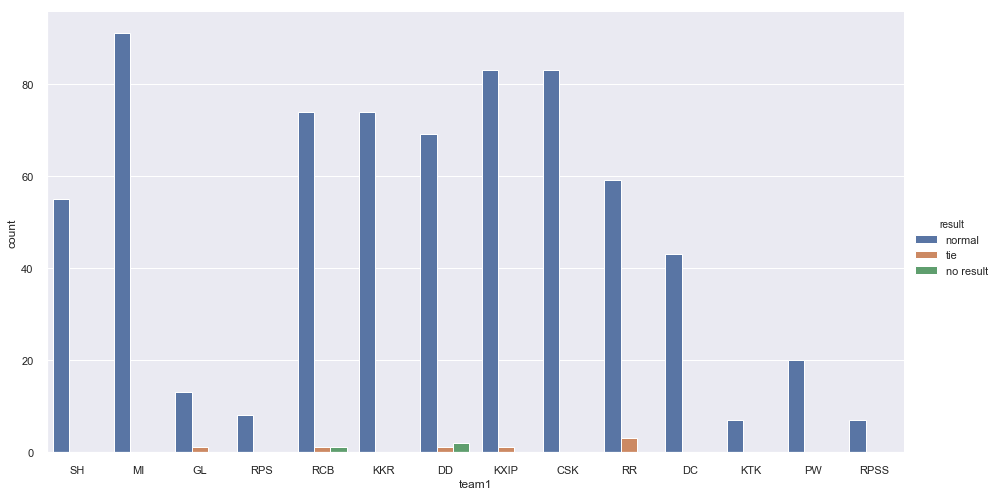

In [27]:
sn.factorplot('team1', hue='result', kind='count', data=ds_with_sort_team_names, size=7, aspect=1.8)

In [28]:
# Answer-3: Team 'Delhi Deardevils' have played maximun number of matches which were not completed.
# And team 'Rajasthan Royals' have played maximum number of matches which were tied.

In [29]:
# Question-4  Find out Which team has won what number of matches and maximum number of matches in all seasons.

ds = ds_with_sort_team_names.groupby(['season','winner'])['season'].count()
ds

season  winner
2008    CSK        9
        DC         2
        DD         7
        KKR        6
        KXIP      10
        MI         7
        RCB        4
        RR        13
2009    CSK        8
        DC         9
        DD        10
        KKR        3
        KXIP       7
        MI         5
        RCB        9
        RR         6
2010    CSK        9
        DC         8
        DD         7
        KKR        7
        KXIP       4
        MI        11
        RCB        8
        RR         6
2011    CSK       11
        DC         6
        DD         4
        KKR        8
        KTK        6
        KXIP       7
                  ..
2015    KKR        7
        KXIP       3
        MI        12
        RCB        8
        RR         7
        SH         7
2016    DD         7
        GL         9
        KKR        8
        KXIP       4
        MI         7
        RCB        9
        RPSS       5
        SH        11
2017    DD         6
        GL         

C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Factor plot for seasons and number of matches')

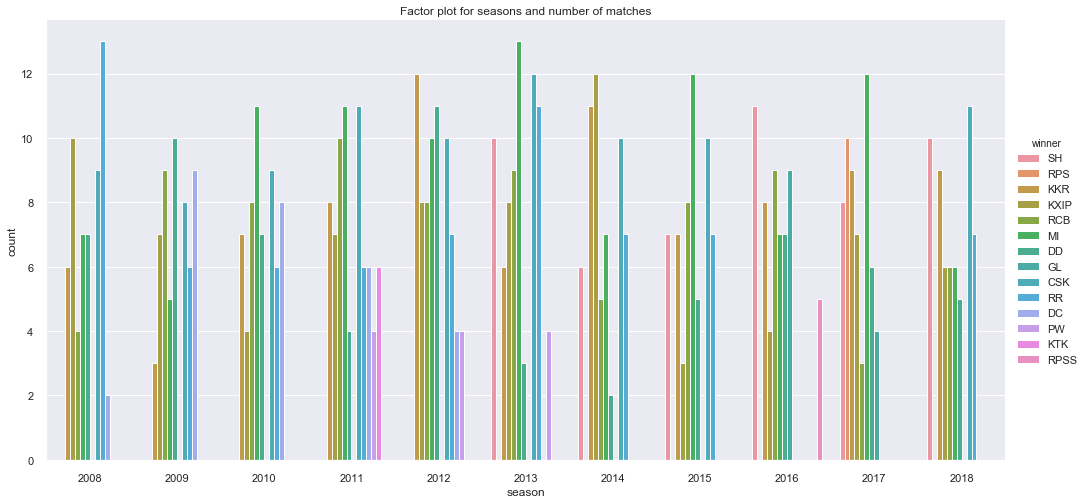

In [50]:
# Above interpretation is not good to remember numbers so we will go with below plotting way.

sn.factorplot('season', hue='winner', kind='count', data=ds_with_sort_team_names, size=7, aspect=2);
plt.title('Factor plot for seasons and number of matches')

In [31]:
# Answer-4: 1. We can say in season 2008 Rajasthan Royels have won maximum number of matches. 
# 2. And, in season 2018 Chennai Super Kings has won maximum number of matches.

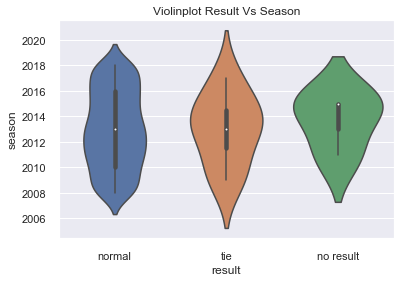

In [32]:
# Question-5: Find out which seasons were most affected with tied and no result matches.

sn.violinplot('result','season', kind='point', data = ds_with_sort_team_names, gridsize=200, width=0.8)
plt.title('Violinplot Result Vs Season')
plt.show()

In [33]:
# Answer-5: 1. By looking into 'tie result' result type, Season 2014 was much affected with maximum number of tied matches.
# 2. By looking into 'normal' and 'no result' result type violin plot, Season 2015 was more affected with no result matches.

C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


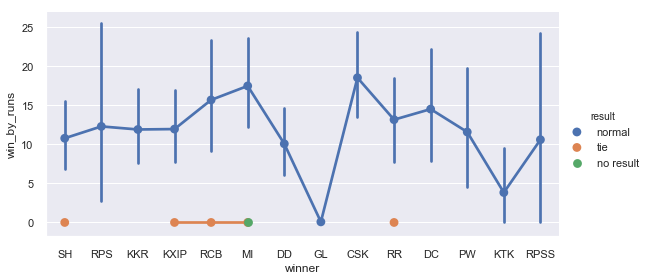

In [34]:
# Question-6: Find out which team have won the match with maximun margin of runs.

sn.factorplot("winner", "win_by_runs", "result", ds_with_sort_team_names, kind="point", size=4, aspect=2)

In [35]:
# Answer-6: From above plotting its clear that Chennai Supper Kings have won match with maximum margin of runs.

C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL PC\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


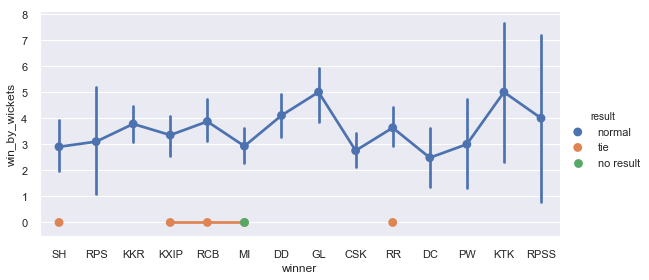

In [36]:
# Question-7: Find out which team have won the match with maximun margin of wickets.

sn.factorplot("winner", "win_by_wickets", "result", ds_with_sort_team_names, kind="point", size=4, aspect=2)

In [37]:
# Answer-7: From above plotting its clear that Kochi Tuskers Kerala and Gujarat Lions have won matches with maximum margin of wickets(5 wickets).

In [38]:
# Question-8: Find out percentage of each teams winning in each season.

# In Mathmatics way.
print("% of winning in") 
print("SH : ", ds_with_sort_team_names[ds_with_sort_team_names.winner == 'SH'].winner.count()/ds_with_sort_team_names[(ds_with_sort_team_names.team1 == 'SH') | ((ds_with_sort_team_names.team2 == 'SH'))].winner.count())
print("MI : ", ds_with_sort_team_names[ds_with_sort_team_names.winner == 'MI'].winner.count()/ds_with_sort_team_names[(ds_with_sort_team_names.team1 == 'MI') | ((ds_with_sort_team_names.team2 == 'MI'))].winner.count())
print("CSK : ", ds_with_sort_team_names[ds_with_sort_team_names.winner == 'CSK'].winner.count()/ds_with_sort_team_names[(ds_with_sort_team_names.team1 == 'CSK') | ((ds_with_sort_team_names.team2 == 'CSK'))].winner.count())

% of winning in
SH :  0.5591397849462365
MI :  0.5906432748538012
CSK :  0.6122448979591837


In [39]:
# By plotting it with crosstab plot.
pd.crosstab([ds_with_sort_team_names.winner], ds_with_sort_team_names.season, margins=True).apply(lambda r: 100*r/len(ds_with_sort_team_names), axis=1).style.background_gradient(cmap='autumn_r')

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
winner,,,,,,,,,,,,
CSK,1.2931,1.14943,1.2931,1.58046,1.43678,1.72414,1.43678,1.43678,0,0,1.58046,12.931
DC,0.287356,1.2931,1.14943,0.862069,0.574713,0,0,0,0,0,0,4.16667
DD,1.00575,1.43678,1.00575,0.574713,1.58046,0.431034,0.287356,0.718391,1.00575,0.862069,0.718391,9.62644
GL,0,0,0,0,0,0,0,0,1.2931,0.574713,0,1.86782
KKR,0.862069,0.431034,1.00575,1.14943,1.72414,0.862069,1.58046,1.00575,1.14943,1.2931,1.2931,12.3563
KTK,0,0,0,0.862069,0,0,0,0,0,0,0,0.862069
KXIP,1.43678,1.00575,0.574713,1.00575,1.14943,1.14943,1.72414,0.431034,0.574713,1.00575,0.862069,10.9195
MI,1.00575,0.718391,1.58046,1.58046,1.43678,1.86782,1.00575,1.72414,1.00575,1.72414,0.862069,14.5115
PW,0,0,0,0.574713,0.574713,0.574713,0,0,0,0,0,1.72414


In [40]:
# Answer-8: 1. From above plot we can easilly say that how each team have their winning percentage in each year.
# 2. We can say that Mumbai Indians have maximum winniing percentage with 14.51%
# 3. At second best winning percentage is for Chennai Super Kings with approx 13%

In [41]:
### Hypothesis => Mumbai Indians and Chennai Super Kings are more likely winning teams.

In [42]:
###----------------------------  This is End of Data Analysis on Project Matches in IPL ------------------------------###